# Monte Carlo Comparisons 
This is for compairing my code to Monte Carlo.

In [1]:
%pylab ipympl
import pickle
import imshow_slider as ims
from topas2numpy import BinnedResult
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


## Testing Dose One
This is a 120 keV monoenergetic pencil beam in an ellipse shape moving from positive to negative z in water. The medium is a 5cm x 5cm x 5cm block with 50 voxels in each axis.

In [118]:
# my_dose_array_corrected = pickle.load(open('dose_19.pickle','rb'))
my_dose_array = pickle.load(open('dose_38.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose1.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [119]:
conversion = 1.602e-10*1.25

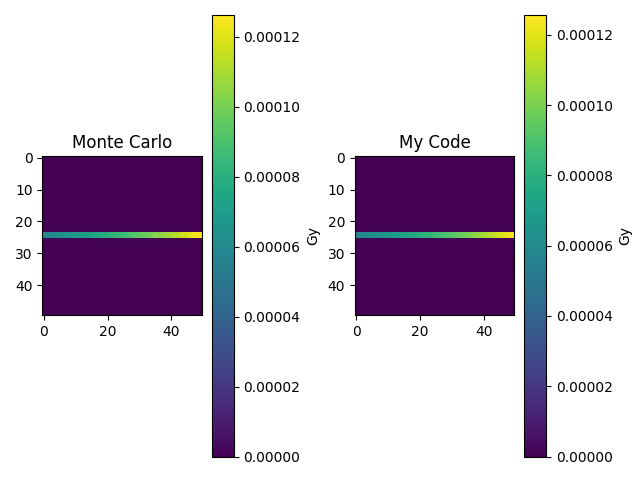

In [120]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


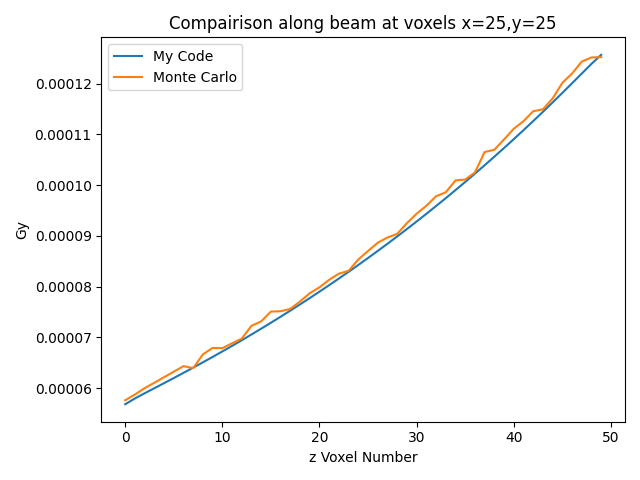

In [121]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[25][25],label='Monte Carlo')
# plot(pickle.load(open('dose_26.pickle','rb'))[25][25]*conversion,label='Uncorrected Centre')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

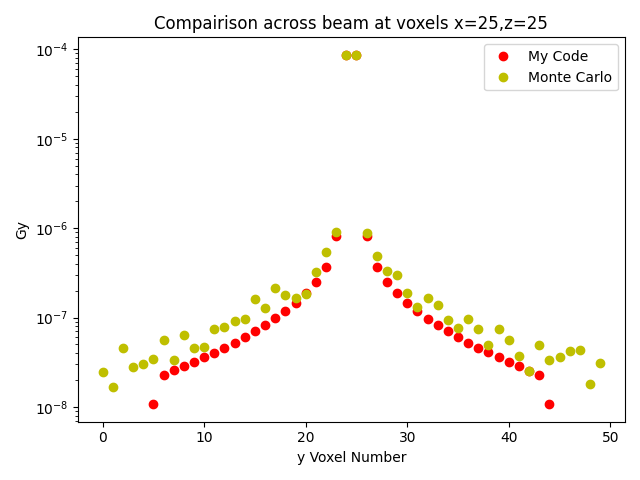

In [122]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code')
        # semilogy(n,pickle.load(open('dose_26.pickle','rb'))[25][n][25]*conversion,'go',label='My Code Uncorrected Centre')
        # semilogy(n,pickle.load(open('dose_21.pickle','rb'))[25][n][25]*conversion,'go',label='My Code \n (Kernel Interaction \n Size is 0.05cm)')
        # semilogy(n,pickle.load(open('dose_12.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Kernel Interaction \n Size is 0.1cm)')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Previous Incorrect \n Kernel Size)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        # semilogy(n,pickle.load(open('dose_26.pickle','rb'))[25][n][25]*conversion,'go')
        # semilogy(n,pickle.load(open('dose_21.pickle','rb'))[25][n][25]*conversion,'go')
        # semilogy(n,pickle.load(open('dose_12.pickle','rb'))[25][n][25]*conversion,'bo')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('y Voxel Number')
tight_layout()

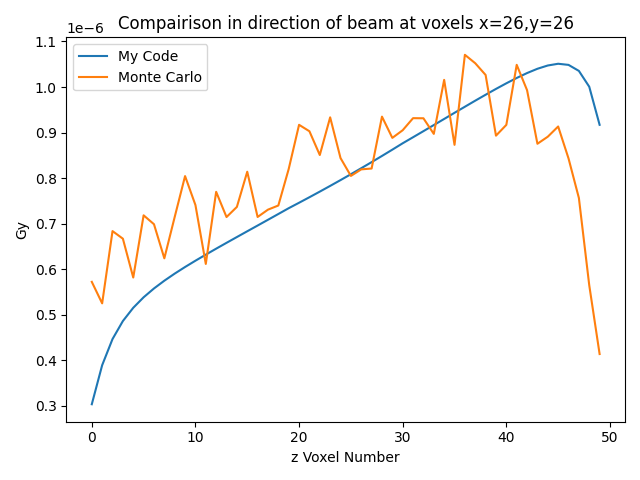

In [123]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[26][26]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

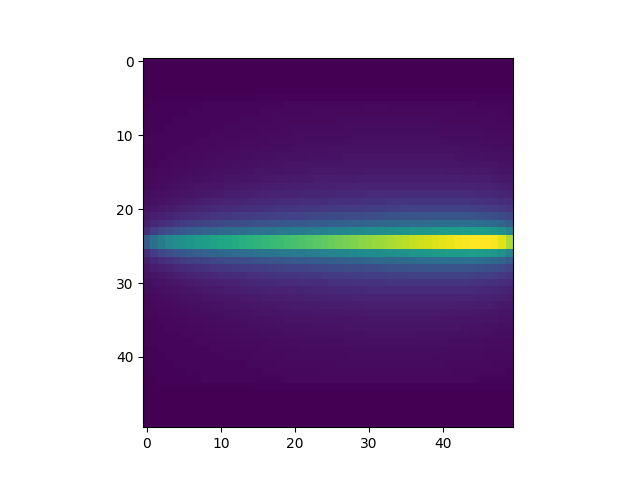

In [124]:
close(6);figure(6)
imshow(my_dose_array[26])

Text(0.5, 1.0, 'percent difference at x=26')

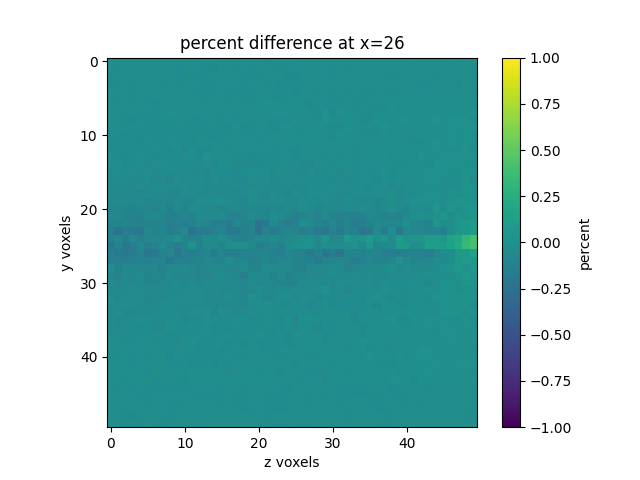

In [127]:
n=26
mini=-1
maxi=1

close(7);figure(7)
# imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.mean(array(np.mean(mc_dose_array[n]),np.mean(my_dose_array[n]*conversion))),vmin=mini,vmax=maxi)
imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.max([mc_dose_array,my_dose_array*conversion])*100,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(n))

# np.max([mc_dose_array[n],my_dose_array[n]*conversion])


## Testing Dose Two
Polyenergtic beam, but the rest of the specifications are the same as above.

In [16]:
my_dose_array = pickle.load(open('dosetest2_1.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose2.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [17]:
conversion = 1.602e-10

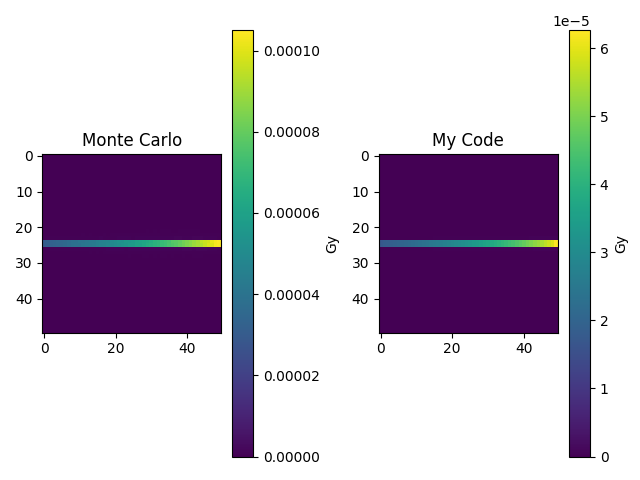

In [18]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()

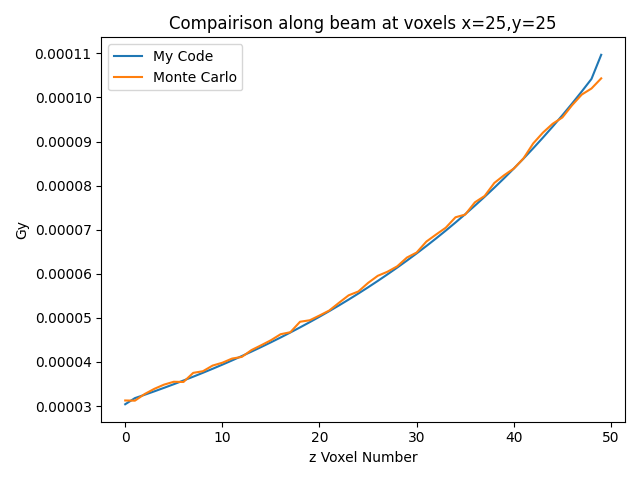

In [19]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion*1.75,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

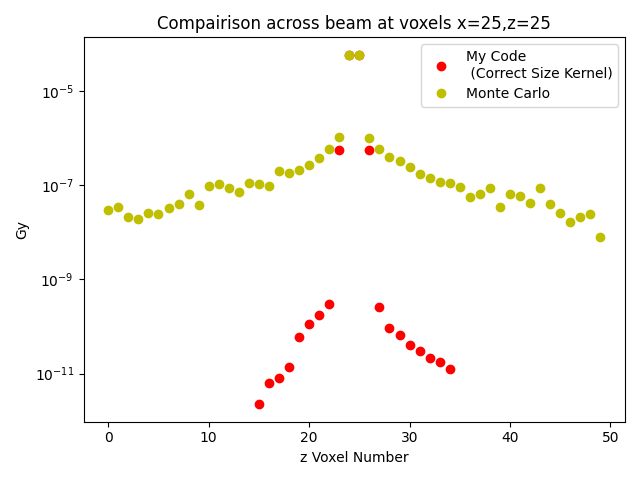

In [20]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion*1.75,'ro',label='My Code \n (Correct Size Kernel)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion*1.75,'ro')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

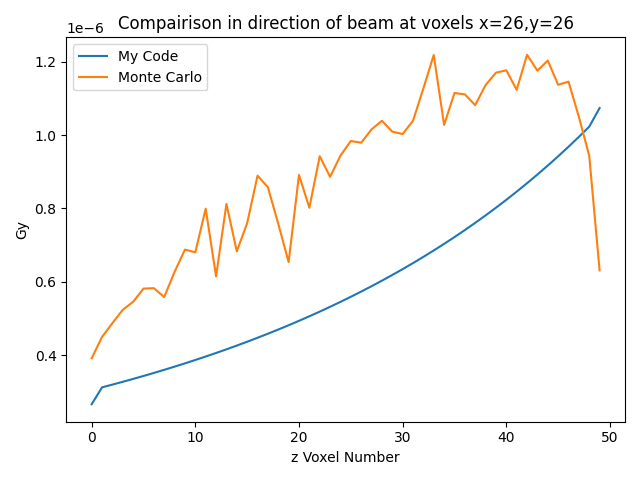

In [24]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion*1.75,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

## Testing Dose Three

In [42]:
my_dose_array = pickle.load(open('dose3_4.pickle','rb'))
mc_dose_array_water_full = BinnedResult('../Topas/TestingDose3_Water.csv')
mc_dose_array_water = mc_dose_array_water_full.data['Sum']
mc_dose_array_bone_full = BinnedResult('../Topas/TestingDose3_Bone.csv')
mc_dose_array_bone = mc_dose_array_bone_full.data['Sum']

mc_dose_array = []

for i in range(len(mc_dose_array_water)):
    mc_dose_array.append([])
    for j in range(len(mc_dose_array_water[0])):
        mc_dose_array[i].append(list(mc_dose_array_bone[i][j])+list(mc_dose_array_water[i][j]))

mc_dose_array = array(mc_dose_array)

In [43]:
conversion = 1.602e-10*1.25

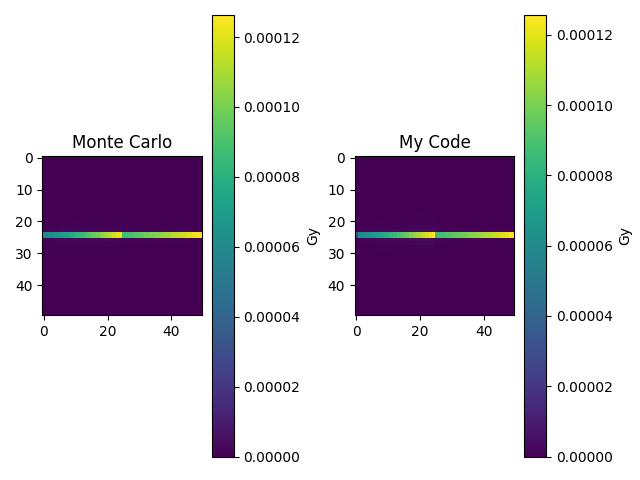

In [44]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


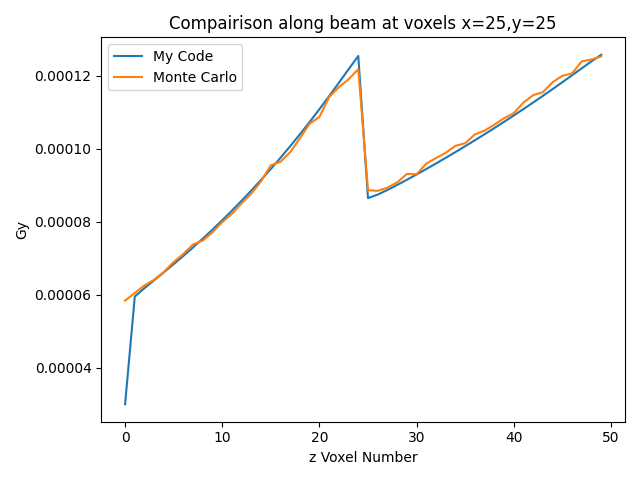

In [45]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

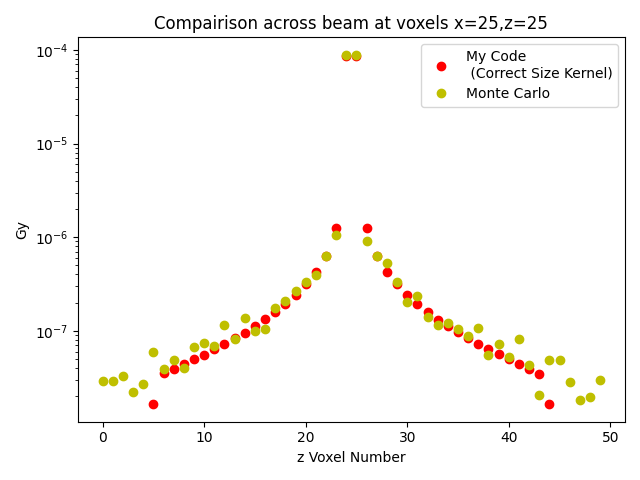

In [46]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code \n (Correct Size Kernel)')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Previous Incorrect \n Kernel Size)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

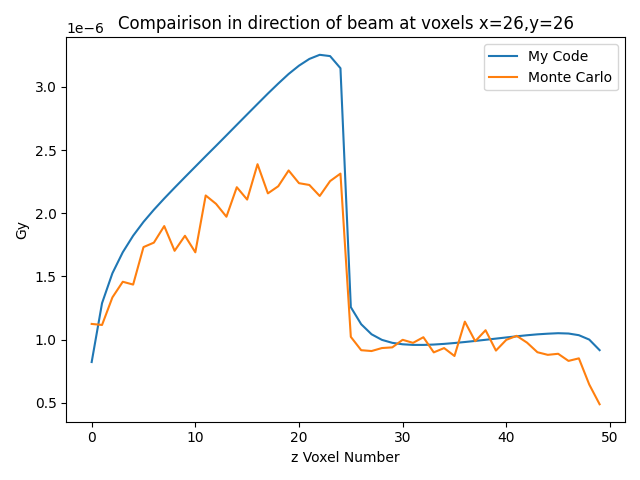

In [47]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

## Testing Dose Four
- 5cm x 5cm x 5cm block of water 
- Same parameters as Testing Dose 1
- Fan Beam with 30 degree angle in Y 

In [12]:
my_dose_array = pickle.load(open('dose4_11.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose4.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [13]:
conversion = 1.602e-10

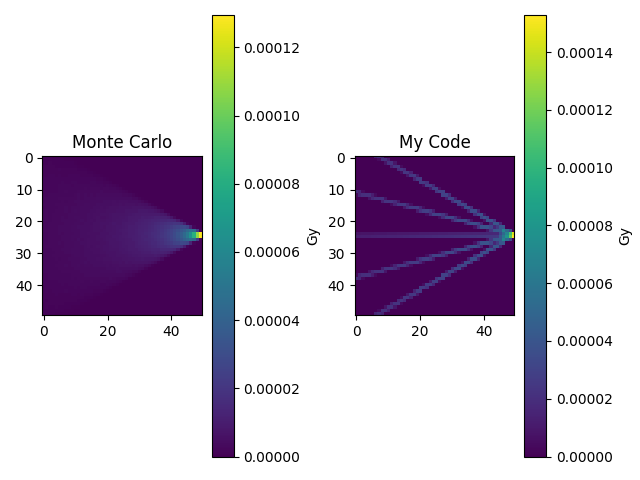

In [14]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


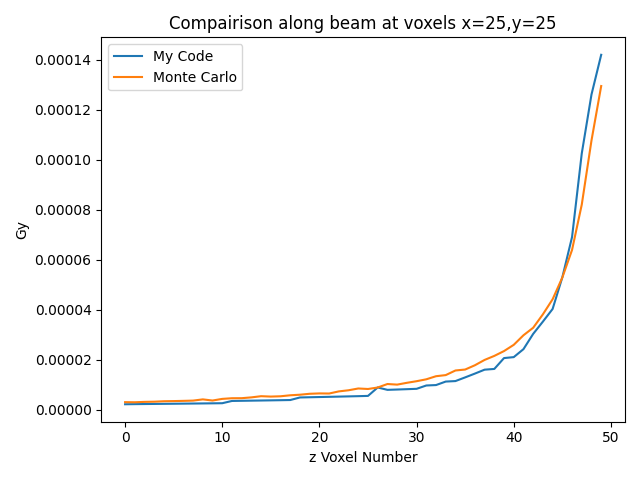

In [8]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

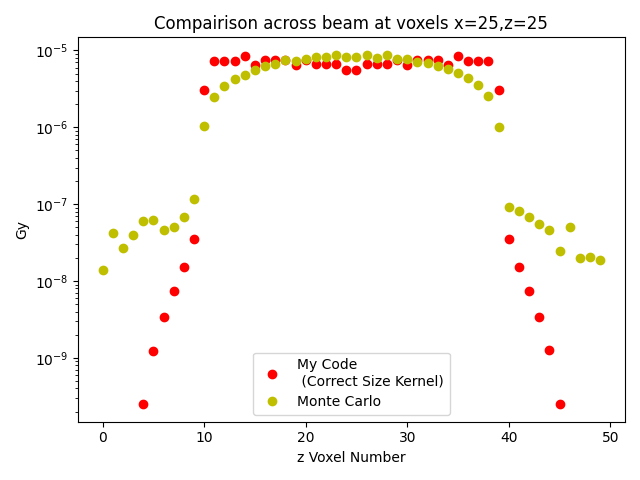

In [9]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code \n (Correct Size Kernel)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

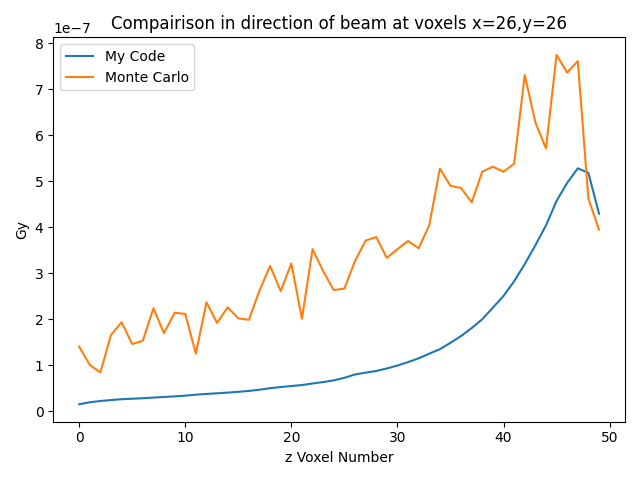

In [10]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

Text(0.5, 1.0, 'percent difference at x=25')

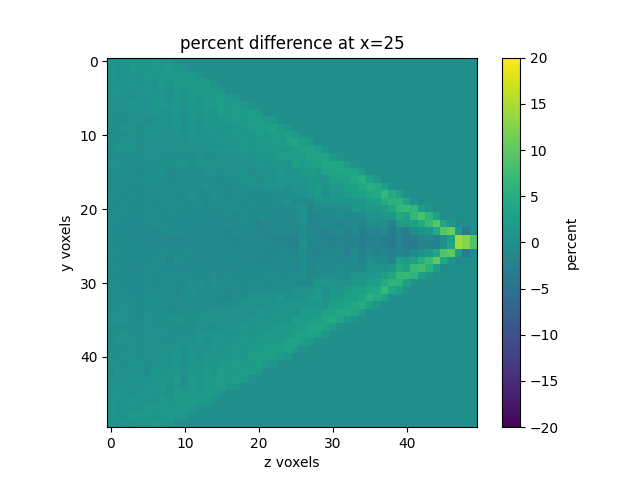

In [11]:
n=25
mini=-20
maxi=20

close(7);figure(7)
# imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.mean(array(np.mean(mc_dose_array[n]),np.mean(my_dose_array[n]*conversion))),vmin=mini,vmax=maxi)
imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.max([mc_dose_array,my_dose_array*conversion])*100,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(n))

## Testing Dose Five

In [130]:
my_dose_array = pickle.load(open('dose5_3.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose5.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [134]:
conversion = 1.602e-10*1.25*1.6

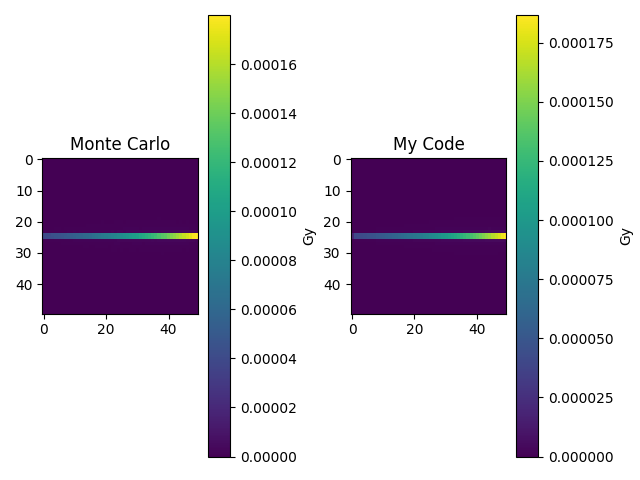

In [135]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


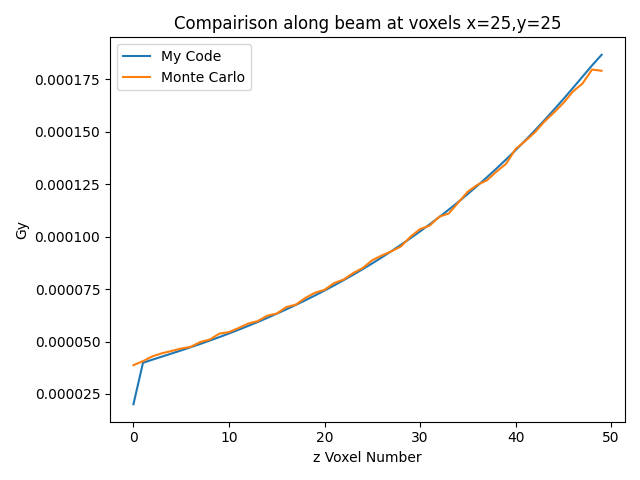

In [136]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code')
plot(mc_dose_array[25][25],label='Monte Carlo')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

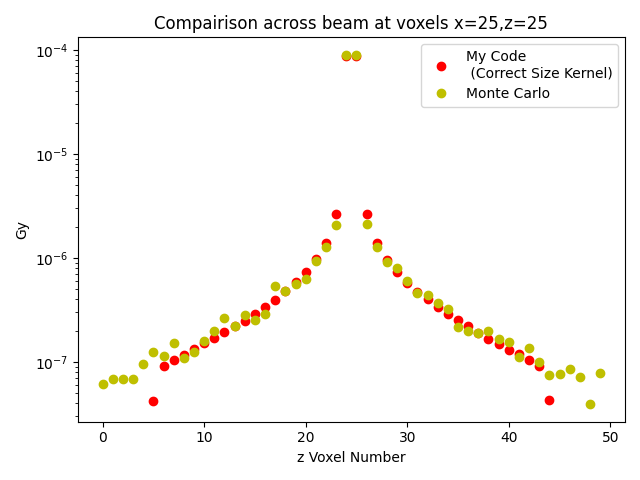

In [68]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code \n (Correct Size Kernel)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

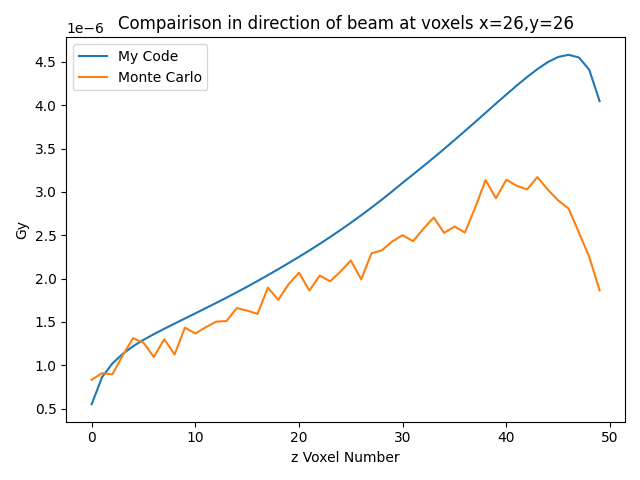

In [69]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

## Testing Dose Six
This is a 120 keV monoenergetic pencil beam in an ellipse shape moving from positive to negative z and 30 degrees in positive y in water. The medium is a 5cm x 5cm x 5cm block with 50 voxels in each axis.

In [105]:
# my_dose_array_corrected = pickle.load(open('dose_19.pickle','rb'))
my_dose_array = pickle.load(open('dose6_2.pickle','rb'))
mc_dose_array_full = BinnedResult('../Topas/TestingDose6.csv')
mc_dose_array = mc_dose_array_full.data['Sum']

In [106]:
conversion = 1.602e-10*1.25

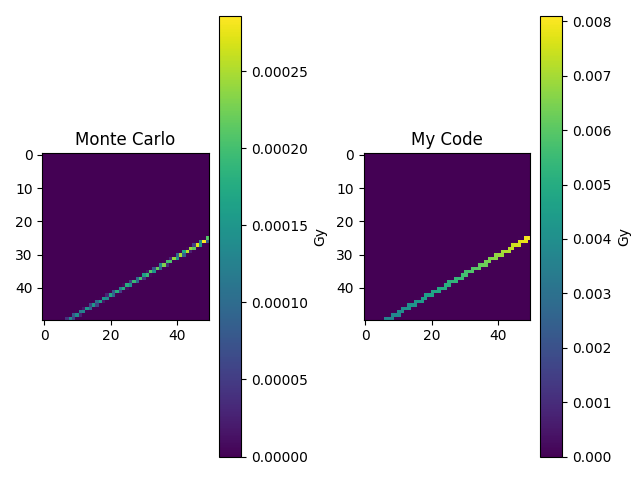

In [107]:
x = 24
bar = True

ifig=1;close(ifig);figure(ifig)
subplot(1,2,1,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array)))
# imshow(mc_dose_array[x],vmin=0,vmax=np.max((mc_dose_array,my_dose_array*1.602e-10)))
title('Monte Carlo')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

subplot(1,2,2,sharex=gca(), sharey=gca(),autoscale_on=True)
imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((my_dose_array*conversion)))
# imshow(my_dose_array[x]*conversion,vmin=0,vmax=np.max((mc_dose_array,my_dose_array*conversion)))
title('My Code')
if bar:
    cbar=colorbar()
    cbar.set_label('Gy')

tight_layout()
# subplot?
# savefig('GOOD_WATER.png')


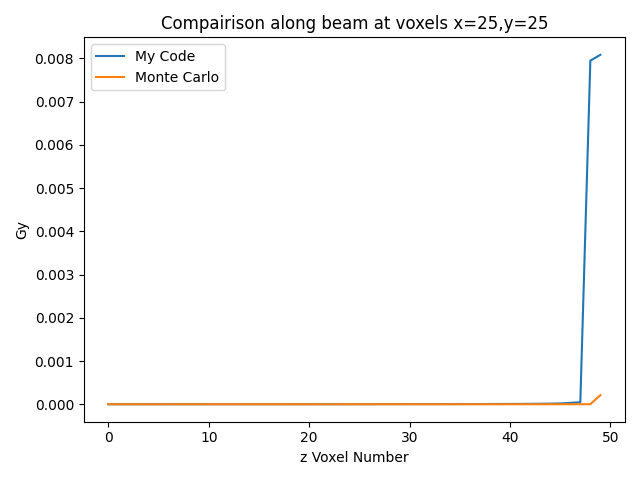

In [108]:
ifig=2;close(ifig);figure(ifig)
plot(my_dose_array[25][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[25][25]*conversion,label='My Code Corrected')
plot(mc_dose_array[25][25],label='Monte Carlo')
# plot(pickle.load(open('dose_26.pickle','rb'))[25][25]*conversion,label='Uncorrected Centre')
legend()
title('Compairison along beam at voxels x=25,y=25')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()
# savefig('TestingDose1.png')

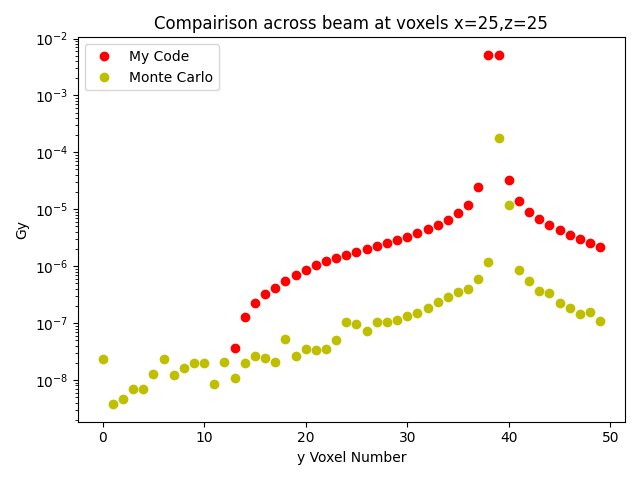

In [109]:
ifig=3;close(ifig);figure(ifig)
for n in range(len(my_dose_array[25])):
    if n == 0:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro',label='My Code')
        # semilogy(n,pickle.load(open('dose_26.pickle','rb'))[25][n][25]*conversion,'go',label='My Code Uncorrected Centre')
        # semilogy(n,pickle.load(open('dose_21.pickle','rb'))[25][n][25]*conversion,'go',label='My Code \n (Kernel Interaction \n Size is 0.05cm)')
        # semilogy(n,pickle.load(open('dose_12.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Kernel Interaction \n Size is 0.1cm)')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo',label='My Code \n (Previous Incorrect \n Kernel Size)')
        semilogy(n,mc_dose_array[25][n][25],'yo',label='Monte Carlo')
    else:
        semilogy(n,my_dose_array[25][n][25]*conversion,'ro')
        # semilogy(n,pickle.load(open('dose_26.pickle','rb'))[25][n][25]*conversion,'go')
        # semilogy(n,pickle.load(open('dose_21.pickle','rb'))[25][n][25]*conversion,'go')
        # semilogy(n,pickle.load(open('dose_12.pickle','rb'))[25][n][25]*conversion,'bo')
        # semilogy(n,pickle.load(open('dose_11.pickle','rb'))[25][n][25]*conversion,'bo')
        semilogy(n,mc_dose_array[25][n][25],'yo')
legend()
title('Compairison across beam at voxels x=25,z=25')
ylabel('Gy')
xlabel('y Voxel Number')
tight_layout()

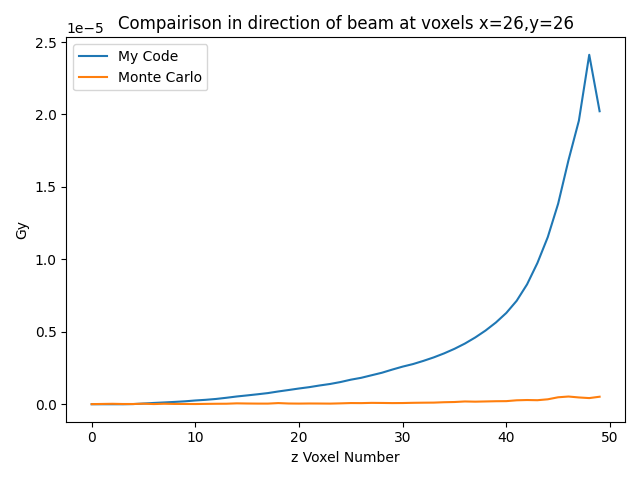

In [110]:
ifig=4;close(ifig);figure(ifig)
plot(my_dose_array[26][25]*conversion,label='My Code') # if I multiply by 1.02 it lines up perfectly (I attribute this to fluence)
# plot(my_dose_array_corrected[26][26]*conversion,label='My Code Corrected')
plot(mc_dose_array[26][25],label='Monte Carlo')
legend()
title('Compairison in direction of beam at voxels x=26,y=26')
ylabel('Gy')
xlabel('z Voxel Number')
tight_layout()

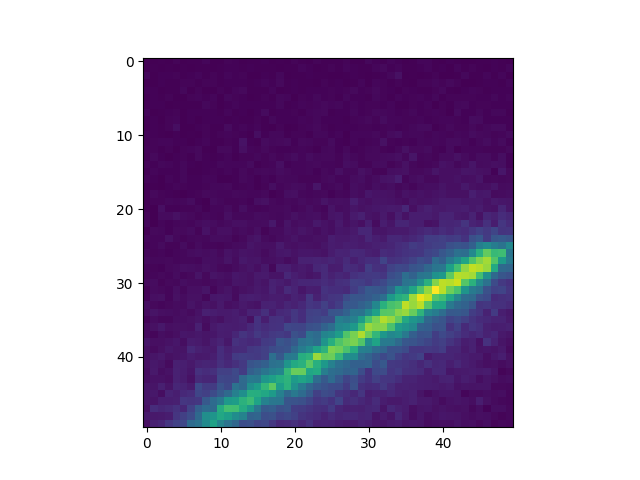

In [111]:
close(6);figure(6)
imshow(mc_dose_array[26])

Text(0.5, 1.0, 'percent difference at x=26')

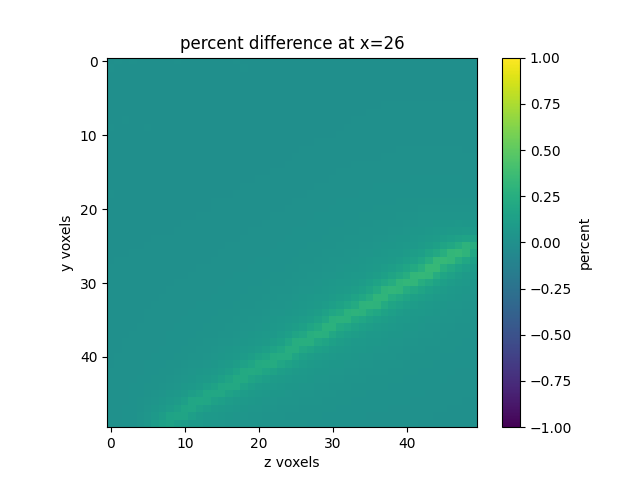

In [117]:
n=26
mini=-1
maxi=1

close(7);figure(7)
# imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.mean(array(np.mean(mc_dose_array[n]),np.mean(my_dose_array[n]*conversion))),vmin=mini,vmax=maxi)
imshow((my_dose_array[n]*conversion-mc_dose_array[n])/np.max([mc_dose_array,my_dose_array*conversion])*100,vmin=mini,vmax=maxi)
cbar=colorbar()
cbar.set_label('percent')
xlabel('z voxels')
ylabel('y voxels')
title('percent difference at x=' + str(n))
